# Pensando de manera estadística en python (Exploración de datos)

En este notebook se presentan maneras de representar los datos mediantes gráficos; a su vez, se presenta la construcción de la distribución de probabilidad empírica para una variable.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [23]:
df = pd.read_csv(r"D:\Dropbox\DataCamp\Pokemon.csv",index_col=0)
df.describe() # Descripción general de las observaciones

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Previo a la realización de cualquier análisis estadístico es fundamental realizar un análisis exploratorio de los datos, donde se pueden ver inicialmente comportaminetos que darán claridad y perspectiva para los análisis posteriores.

## Histogramas

Se usa el dataset de pokémon para analizar sus características. Inicialente se realiza un histograma sobre las habilidades de ataque

In [4]:
sns.set()    # Se habilita el módulo de seaborn para una visualización más estética

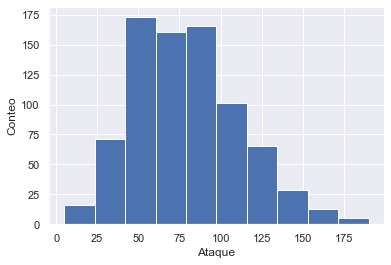

In [5]:
plt.hist(df.Attack)
plt.xlabel("Ataque")
plt.ylabel("Conteo");

## Diagramas de enjambre (o de puntos)

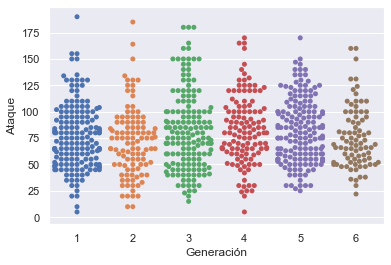

In [6]:
sns.swarmplot(x="Generation", y="Attack", data=df)
plt.xlabel("Generación")
plt.ylabel("Ataque");

Tambien se podría realizar un gráfico de cajas para representar información adicional asociada con los percentiles

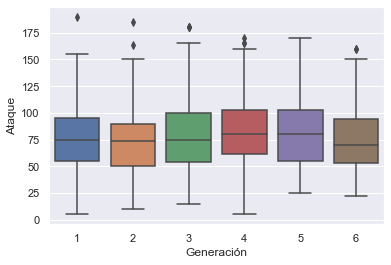

In [13]:
# Comparación de generaciones y puntos de ataque

sns.boxplot(x="Generation", y="Attack", data=df)
plt.xlabel("Generación")
plt.ylabel("Ataque")
plt.show()

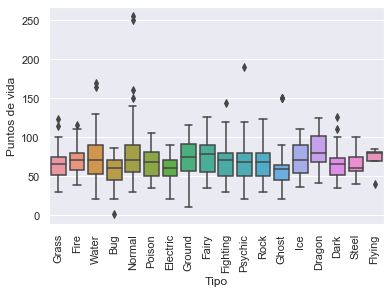

In [12]:
# Comparación entre tipos de pokemon y sus puntos de salud (vida)

sns.boxplot(x="Type 1", y="HP", data=df) # Visualizar múltiples diagramas de caja en uno solo
plt.xlabel("Tipo")                       # Agregar etiqueta al eje x
plt.ylabel("Puntos de vida")                     # Agregar etiqueta al eje y
plt.xticks(rotation=90);                 # Rotación de los nombres en los eje

## Gráfico de dispersión

En algunas situaciones también se desea evaluar el comportamiento de una variable cuando otra cambia, es decir, se busca evaluar si están correlacionadas. Una manera de visualizar esta correlación es mediante los gráficos de dispersión.

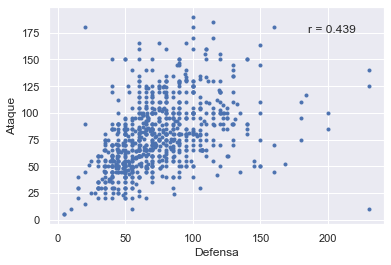

In [9]:
x = df.Defense
y = df.Attack

plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel("Defensa")
plt.ylabel("Ataque")
plt.text(185,175, "r = %.3f" % np.corrcoef(x,y)[0,1]);

## Función emprírica de distribución acumulada

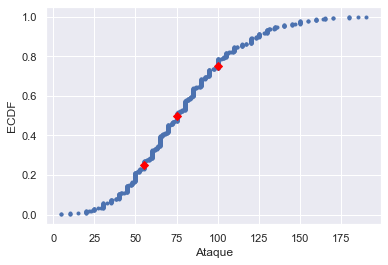

In [10]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    return x,y

x,y = ecdf(df.Attack)
plt.plot(x,y,marker=".",linestyle="none")
plt.xlabel("Ataque")
plt.ylabel("ECDF");

# Agregar los percentiles
percentiles = np.array([25,50,75])
perc = np.percentile(df.Attack,percentiles)

plt.plot(perc, percentiles/100, marker="D", linestyle="none", color="red");